#Import Python Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset

In [2]:
Data=pd.read_csv("Zomato data .csv")
Data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
#Overview of dataset,datatypes and missing values
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
#Statstical Summary of Dataset
Data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [9]:
#list of all columns
Data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [11]:
#check for missing values
Data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Conclusion:There is no null value in a Dataset

In [13]:
#Convert the datatype of rate column to float and remove the denominator
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
Data['rate']=Data['rate'].apply(handleRate)  
Data.head()
    

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types of resturant')

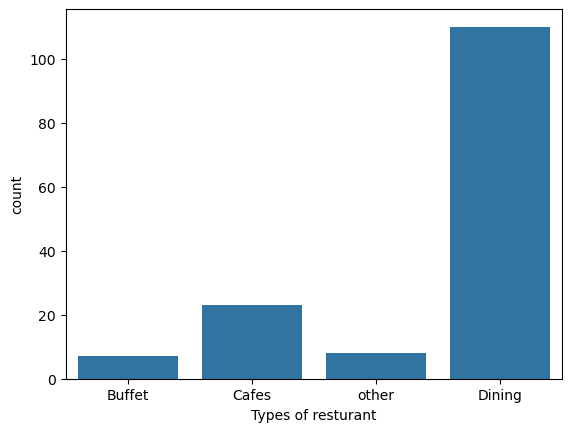

In [15]:
#Type of resturant
sns.countplot(x=Data['listed_in(type)'])
plt.xlabel('Types of resturant')

Conclusion:Majority of the resturants fall into the Dining category

Text(0, 0.5, 'Votes')

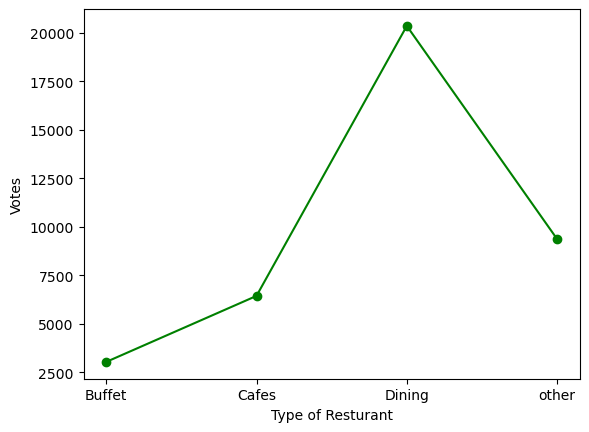

In [17]:
#Voting Distribution
grouped_Data=Data.groupby('listed_in(type)')['votes'].sum()
grouped=pd.DataFrame({'votes':grouped_Data})
plt.plot(grouped,c='green',marker='o')
plt.xlabel('Type of Resturant')
plt.ylabel('Votes')



Conclusion:Dining Resturants are preferred by large number of individuals

Text(0.5, 1.0, 'Rating Distribution')

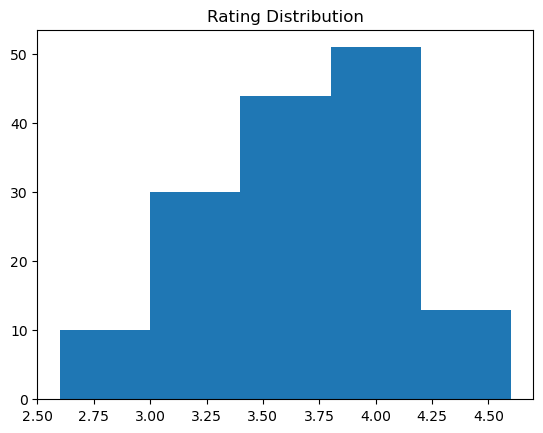

In [19]:
#Rating distribution
plt.hist(Data['rate'],bins=5)
plt.title('Rating Distribution')

Conclusion:The majority of resturants received rating ranges from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

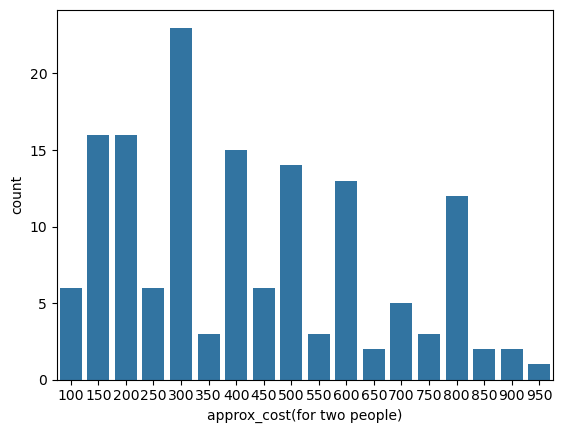

In [21]:
 #majority approx_cost(for two people)
sns.countplot(x=Data['approx_cost(for two people)'])

Conclusion:The majority of Couples prefer resturants with approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

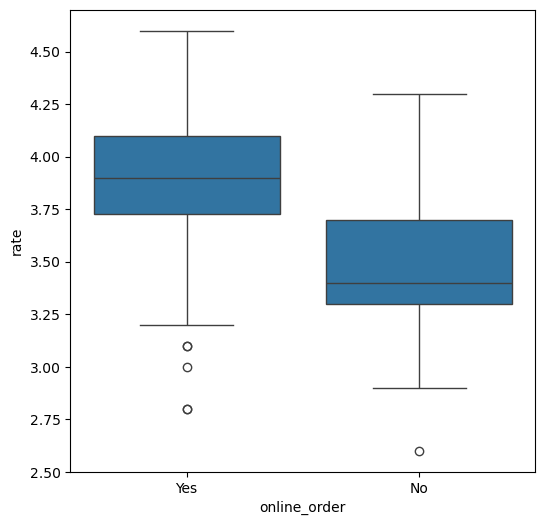

In [23]:
#whether Online orders receive high rating or offline orders
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=Data)

Conclusion:Online Orders received higher ratings in comparison to offline orders

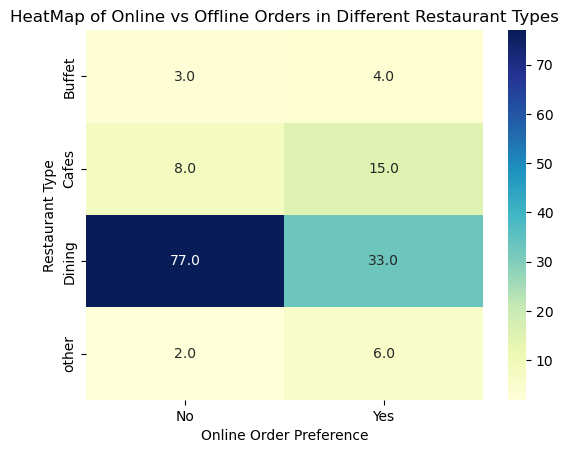

In [25]:
#whether in different types of resturants Client prefer online or offline order
pivot_table=Data.pivot_table(index='listed_in(type)',columns='online_order',values='votes',aggfunc='size')
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='.1f')
plt.title('HeatMap of Online vs Offline Orders in Different Restaurant Types')
plt.xlabel('Online Order Preference')
plt.ylabel('Restaurant Type')
plt.show()

Conclusion:Clients prefer order in person at resturants while prefer online orders at cafe because dining resturant primarily accept offline orders